In [24]:
import pandas as pd


df = pd.read_csv("../../data/dataset/train.csv")
df.pop('timestamp')
df = df.rename(columns={'chain': "chain_id", "image": "path"})

df['path'] = df.chain_id.astype(str).str.cat(df.path, sep="/")
df = df.set_index("path")
df.hist(bins=88)
df

,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,85,24607
6/8000febe81817f7f.jpg,6,25389
3/80053befc2d42fba.jpg,3,672
5/8007fa0a8fe89f9d.jpg,5,63866
0/800a4a6b6f6d2df6.jpg,0,12036
...,...,...
83/ffff8082ec219892.jpg,83,20544
82/ffff8200e50cc0f1.jpg,82,51053
83/ffff84129981a4a4.jpg,83,42842


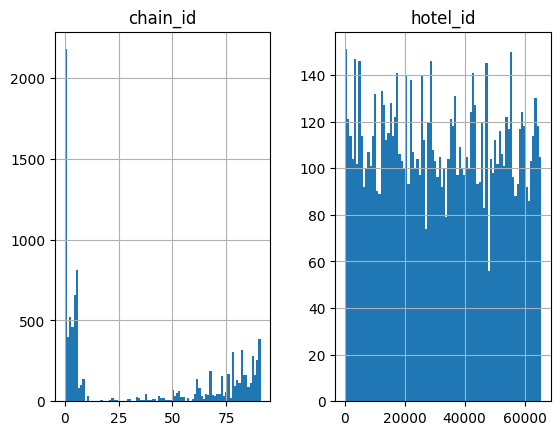

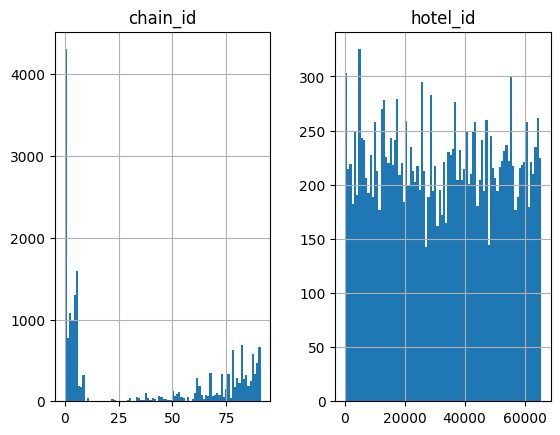

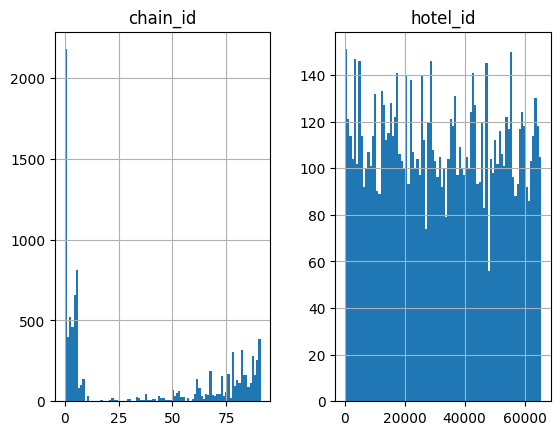

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import torch

df_shuffled = df.sample(frac=1)
train, val, test = np.split(df_shuffled, [int(0.7*len(df_shuffled)), int(0.9*len(df_shuffled))])
test.hist(bins=88)
val.hist(bins=88)
test.hist(bins=88)

train.to_csv("../../data/dataset/hotel_train_chain.csv")
val.to_csv("../../data/dataset/hotel_val_chain.csv")
test.to_csv("../../data/dataset/hotel_test_chain.csv")